

---


## Nama : MOCHAMAD PHILLIA WIBOWO

## ID : A012YBF393

## Kelas : Machine Learning Terapan (Proyek Submission 1)

---



# Pendahuluan

---


Notebook ini bertujuan untuk membangun dan mengevaluasi model machine learning menggunakan dataset Animal_Face. Dataset ini berisi tiga kelas yaitu dog (anjing), cat (kucing), dan wild (satwa liar). Setiap tahap proses akan dijelaskan secara sistematis untuk memberikan pemahaman yang menyeluruh.

# Import Library & Dataset

---



Langkah awal dalam membangun proyek machine learning adalah mengimpor pustaka yang diperlukan.

In [ ]:
import os, shutil
import random
import seaborn as sns
from random import sample
import matplotlib.pyplot as plt
from shutil import copyfile
import pathlib
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
import cv2
from PIL import Image
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,  ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras  import Model,layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer,Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten,Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import warnings
from skimage import io
from collections import Counter
warnings.simplefilter(action='ignore',category=FutureWarning)



*   **Pustaka untuk manajemen file dan sistem operasi**

Kode import os, shutil digunakan untuk menangani operasi file dan direktori, seperti membuat folder baru, memindahkan file, dan menghapus file atau folder.


---


* **Pustaka untuk manipulasi data dan visualisasi**

Modul seperti random, numpy, pandas, matplotlib.pyplot, dan seaborn merupakan pustaka umum dalam proyek data science. random digunakan untuk pengacakan data, numpy untuk operasi numerik, pandas untuk memproses data tabular, dan matplotlib serta seaborn untuk visualisasi data secara grafik.


---


*   **Pustaka untuk pemrosesan gambar**

Beberapa pustaka seperti cv2 (OpenCV), PIL.Image, skimage, dan tqdm digunakan untuk pemrosesan citra. cv2 dan PIL sering digunakan untuk membaca dan mengubah gambar, sedangkan skimage menyediakan berbagai fungsi transformasi gambar seperti rotasi, penyesuaian gamma, penambahan noise, serta transformasi afine. tqdm memberikan progress bar selama proses iterasi.


---


*   **Pustaka untuk machine learning dan deep learning**

Pustaka utama untuk deep learning adalah tensorflow dan keras. Modul tensorflow.keras digunakan untuk membangun, melatih, dan mengevaluasi model neural network. Fungsinya termasuk layer-layer CNN (seperti Conv2D, MaxPooling2D, Dense), preprocessing gambar (ImageDataGenerator, img_to_array), dan juga optimizers seperti Adam, RMSprop, dan SGD.


---


*   **Model arsitektur pretrained dan komponen pelatihan**

Kode ini juga mengimpor arsitektur model pretrained seperti MobileNet dan DenseNet121 dari tensorflow.keras.applications, yang dapat digunakan untuk transfer learning. Selain itu, terdapat ModelCheckpoint, Callback, dan EarlyStopping untuk mengontrol proses pelatihan model agar lebih efisien.


---



*   **Evaluasi performa model**

Untuk mengukur kinerja model, digunakan fungsi dari sklearn.metrics seperti confusion_matrix, classification_report, dan ConfusionMatrixDisplay. Hal ini penting untuk menilai akurasi dan kesalahan klasifikasi dari model.


---


*   **Utilities tambahan**

Modul collections.Counter digunakan untuk menghitung jumlah item dalam suatu koleksi (seperti distribusi label kelas), sementara warnings.simplefilter digunakan untuk mengabaikan peringatan tertentu agar tidak mengganggu output program.


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kode from google.colab import drive dan drive.mount('/content/drive') digunakan untuk mengakses file yang tersimpan di Google Drive saat bekerja di lingkungan Google Colab.

# Data Preparation

---



Data dibaca dari folder yang berisi kumpulan gambar hewan dan dilakukan eksplorasi awal untuk memahami struktur dan karakteristik data.

## Data Loading

---



In [ ]:
!unzip "/content/drive/MyDrive/Face_Animal.zip"

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train

Perintah !unzip "/content/drive/MyDrive/Face_Animal.zip" digunakan untuk mengekstrak file arsip berformat .zip secara langsung di lingkungan Google Colab.

Jalur file "/content/drive/MyDrive/Face_Animal.zip" mengacu pada file ZIP yang berada di Google Drive saya.

In [ ]:
os.makedirs('/content/Animal_Face/dataset')

Perintah os.makedirs('/content/Animal_Face/dataset') digunakan untuk membuat folder atau direktori baru secara rekursif pada jalur yang ditentukan, dalam hal ini /content/Animal_Face/dataset.

In [ ]:
train_dir="/content/afhq/train"
val_dir="/content/afhq/val"

combined_dir="/content/Animal_Face/dataset"

Baris-baris kode berikut digunakan untuk mendefinisikan jalur direktori dataset yang akan digunakan dalam proyek

*   train_dir menunjuk ke folder data pelatihan: /content/afhq/train
*   val_dir menunjuk ke folder data validasi: /content/afhq/val
*   combined_dir menunjuk ke folder baru untuk menyimpan dataset gabungan atau hasil pemrosesan: /content/Animal_Face/dataset





In [ ]:
for category in os.listdir(train_dir):
  category_dir=os.path.join(train_dir,category)
  if os.path.isdir(category_dir):
    shutil.copytree(category_dir, os.path.join(combined_dir,category), dirs_exist_ok=True)


for  category in os.listdir(val_dir):
  category_dir=os.path.join(val_dir, category)
  if os.path.isdir(category_dir):
    shutil.copytree(category_dir,os.path.join(combined_dir, category), dirs_exist_ok=True)

Kode ini digunakan untuk menyalin seluruh data dari folder pelatihan (train_dir) dan validasi (val_dir) ke dalam satu folder gabungan (combined_dir).

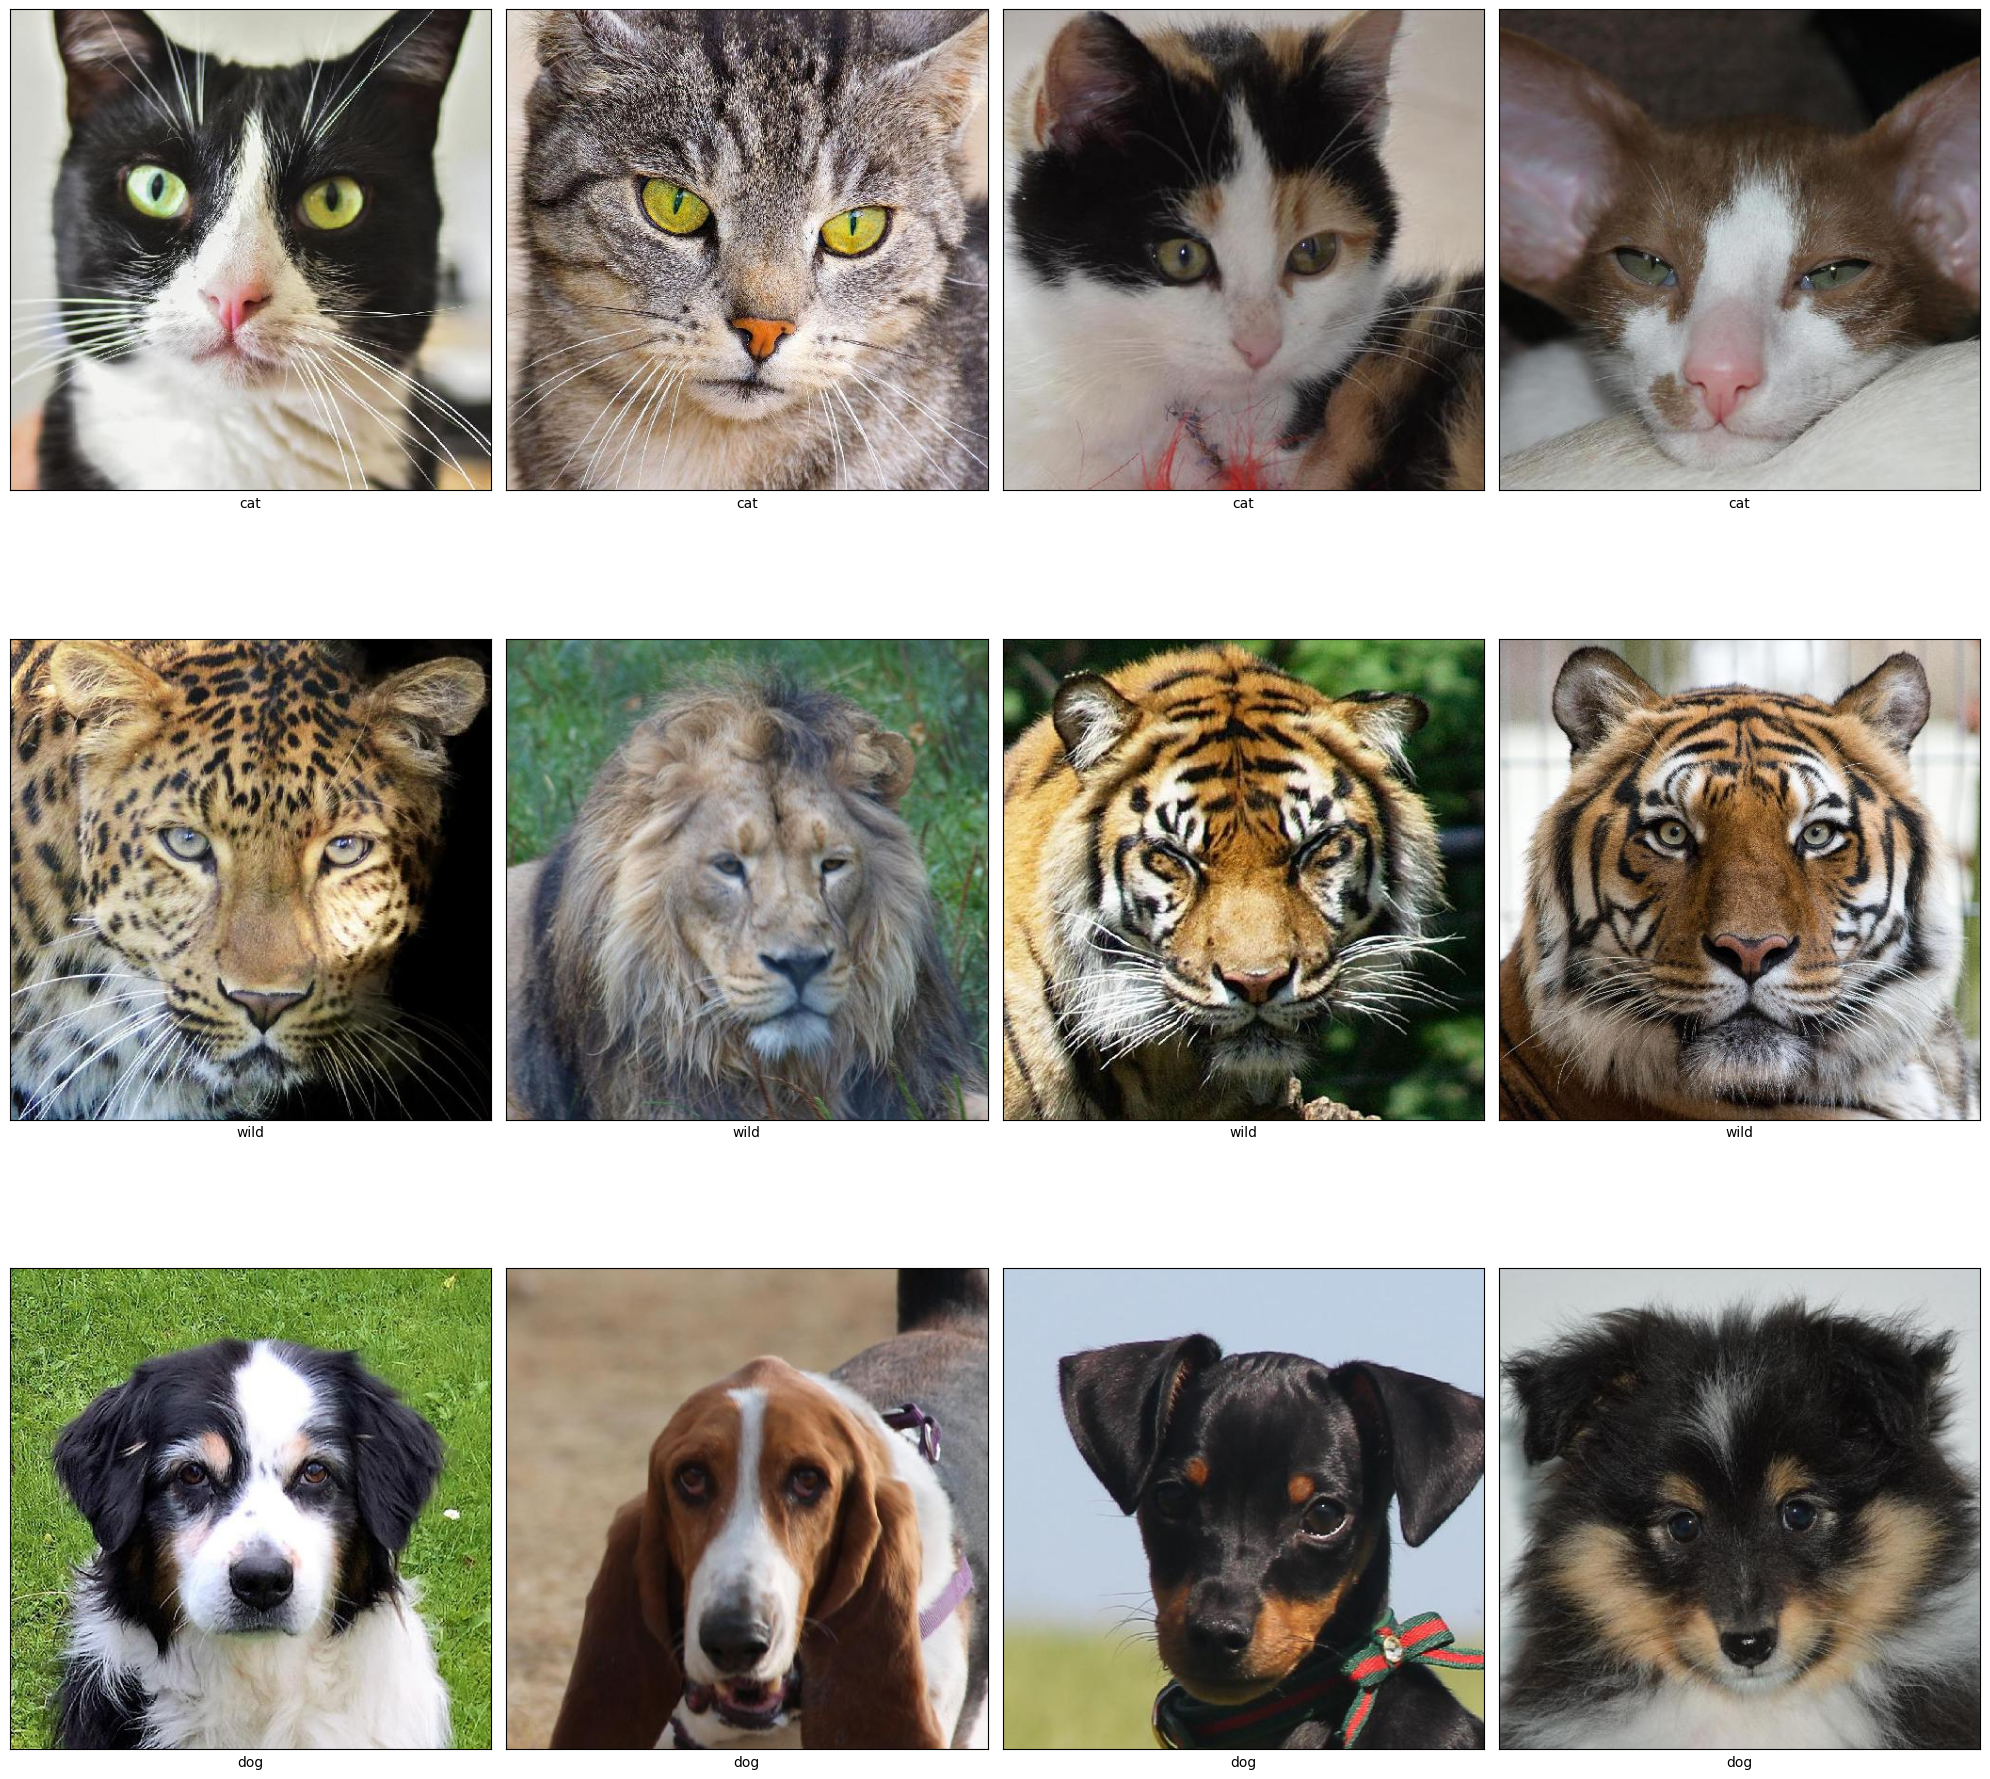

In [ ]:
animal_face={}
path="/content/Animal_Face"
path_sub=os.path.join(path,"dataset")

for i in os.listdir(path_sub):
  animal_face[i]=os.listdir(os.path.join(path_sub,i))

path_sub="/content/Animal_Face/dataset"

fig,axs = plt.subplots(len(animal_face.keys()), 4, figsize=(20,20))

for i, class_name in enumerate(os.listdir(path_sub)):
  images= np.random.choice(animal_face[class_name],4, replace=False)

  for j, image_name in enumerate (images):
    img_path=os.path.join(path_sub, class_name, image_name)
    img=Image.open(img_path)
    axs[i,j].imshow(img)
    axs[i,j].set(xlabel=class_name, xticks=[], yticks=[])

fig.tight_layout()

Kode ini digunakan untuk menampilkan contoh gambar dari setiap kelas dalam dataset hewan. Pertama, dictionary animal_face dibuat untuk menyimpan daftar gambar berdasarkan kategori kelas dari folder dataset. Kemudian, sebuah grid plot dibuat dengan jumlah baris sesuai jumlah kelas dan 4 kolom. Dari setiap kelas, 4 gambar dipilih secara acak dan ditampilkan dalam grid, di mana setiap gambar diberi label sesuai dengan nama kelasnya tanpa sumbu atau tanda.

# Data Preprocessing

---



Data mentah perlu diproses sebelum digunakan dalam pelatihan model. Langkah-langkah mencakup :

*   Menghitung jumlah gambar di setiap kelas
*   Menghitung Setiap folder class jumlah gambar dan jumlah ukurannya
*   Melakukan Augmentasi Data





## Menghitung Jumlah gambar di setiap kelas

---



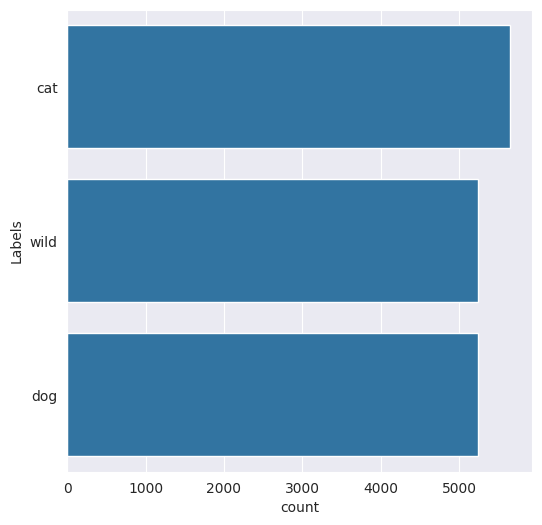

In [ ]:
animal_face="/content/Animal_Face/dataset"

file_name=[]
labels=[]
full_path=[]

for path, subdirs, files in os.walk(animal_face):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

distribution_train=pd.DataFrame( {"path":full_path, 'file_name':file_name,"Labels":labels})

Label=distribution_train['Labels']
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
plt.data=sns.countplot(Label)

Kode ini digunakan untuk mengumpulkan informasi tentang file dalam dataset dan memvisualisasikan distribusi label. Dengan menggunakan os.walk, kode ini menelusuri semua subfolder dalam animal_face untuk mendapatkan jalur lengkap, nama file, dan label (kategori kelas) dari setiap gambar. Informasi tersebut kemudian disimpan dalam DataFrame distribution_train. Selanjutnya, distribusi jumlah gambar per kelas divisualisasikan dengan menggunakan sns.countplot untuk menunjukkan sebaran jumlah gambar dalam setiap label

## Menghitung Setiap folder class jumlah gambar dan jumlah ukurannya

---



In [ ]:
folder_path1="/content/Animal_Face/dataset/cat"
folder_path2="/content/Animal_Face/dataset/dog"
folder_path3="/content/Animal_Face/dataset/wild"
ekstensi_gambar=('.png','.jpg','.bmp','.gif','.webp')
ukuran_counter1 =Counter()
ukuran_counter2=Counter()
ukuran_counter3=Counter()

Kode ini digunakan untuk mempersiapkan penghitungan ukuran gambar berdasarkan kategori. folder_path1, folder_path2, dan folder_path3 merujuk pada jalur direktori yang berisi gambar untuk kategori "cat", "dog", dan "wild". Variabel ekstensi_gambar berisi daftar ekstensi file gambar yang valid. Kemudian, tiga objek Counter (ukuran_counter1, ukuran_counter2, dan ukuran_counter3) dibuat untuk menghitung ukuran gambar di masing-masing folder. Counter ini akan digunakan untuk menghitung frekuensi ukuran gambar yang ditemukan dalam setiap kategori.

In [ ]:
if not os.path.exists(folder_path1):
  print(f"Folder {folder_path1} tidak ditemukan ")
else:
  for filename in os.listdir(folder_path1):
    if filename.lower().endswith(ekstensi_gambar):
      path_gambar=os.path.join(folder_path1, filename)
      try:
        with Image.open(path_gambar) as img:
          ukuran1=img.size
          ukuran_counter1[ukuran1] +=1
      except Exception as e:
        print(f"Gagal buka {filename}: {e}")

if ukuran_counter1:
  print("Ukuran yang Ditemukan pada class Cat:")
  for ukuran,jumlah in ukuran_counter1.items():
    print(f"{ukuran[0]} x {ukuran[1]}: {jumlah} gambar")
else:
  print("Tidak ada gambar ditemukan")

Ukuran yang Ditemukan pada class Cat:
512 x 512: 5653 gambar


Kode ini memeriksa apakah folder yang berisi gambar untuk kategori "cat" (folder_path1) ada. Jika tidak ada, pesan kesalahan akan ditampilkan. Jika folder ada, kode akan menelusuri semua file dalam folder tersebut dan memeriksa ekstensi file yang sesuai dengan daftar ekstensi_gambar. Untuk setiap file gambar yang valid, ukuran gambar akan diambil menggunakan Image.open(). Ukuran gambar tersebut dihitung dan disimpan dalam ukuran_counter1.

Setelah pemrosesan selesai, jika ada ukuran gambar yang ditemukan, jumlah gambar berdasarkan ukuran akan dicetak, seperti dalam contoh output "512 x 512: 5653 gambar".

In [ ]:
if not os.path.exists(folder_path2):
  print(f" Folder {folder_path2} tidak ditemukan  ")
else:
  for filename in os.listdir(folder_path2):
    if filename.lower().endswith(ekstensi_gambar):
      path_gambar=os.path.join(folder_path2,filename)
      try:
        with Image.open(path_gambar) as img:
          ukuran2=img.size
          ukuran_counter2[ukuran2] +=1
      except Exception as e:
        print(f"Gagal buka {filename} :{e}")

if ukuran_counter2:
  print("Ukuran yang ditemukan pada class Dog")
  for ukuran, jumlah in ukuran_counter2.items():
    print(f"{ukuran[0]} x {ukuran[1]}: {jumlah} gambar")
else:
  print("Tidak ada gambar yang ditemukan")

Ukuran yang ditemukan pada class Dog
512 x 512: 5239 gambar


Kode ini berfungsi untuk memeriksa dan menghitung ukuran gambar dalam folder kategori "dog" (folder_path2). Jika folder tidak ditemukan, akan ditampilkan pesan kesalahan. Jika folder ada, kode akan menelusuri semua file di dalamnya dan memeriksa ekstensi file gambar yang valid. Untuk setiap gambar yang valid, ukuran gambar akan diambil dan disimpan dalam ukuran_counter2.

Setelah pemrosesan selesai, jika ukuran gambar ditemukan, maka jumlah gambar untuk setiap ukuran akan dicetak, seperti contoh output "512 x 512: 5239 gambar".

In [ ]:
if not os.path.exists(folder_path3):
  print(f"Folder :{folder_path3} tidak ditemukan")
else:
  for filename in os.listdir(folder_path3):
    if filename.lower().endswith(ekstensi_gambar):
      path_gambar=os.path.join(folder_path3, filename)
      try:
        with  Image.open(path_gambar) as img :
          ukuran3=img.size
          ukuran_counter3[ukuran3] +=1
      except Exception as e:
        print(f"Gagal membuka {filename}:{e}")

if ukuran_counter3:
  print("Ukuran yang ditemukan pada class Wild")
  for ukaran, jumlah in ukuran_counter3.items():
    print(f"{ukuran[0]} x {ukuran[1]} :{jumlah} gambar")
else:
  print("Tidak ada gambar ditemukan")

Ukuran yang ditemukan pada class Wild
512 x 512 :5238 gambar


Kode ini digunakan untuk memeriksa dan menghitung ukuran gambar dalam folder kategori "wild" (folder_path3). Jika folder tidak ditemukan, pesan kesalahan akan ditampilkan. Jika folder ditemukan, kode akan memeriksa semua file gambar yang memiliki ekstensi yang valid. Ukuran gambar diambil menggunakan Image.open() dan disimpan dalam ukuran_counter3.

Setelah pemrosesan selesai, jika ukuran gambar ditemukan, jumlah gambar untuk setiap ukuran akan dicetak, seperti contoh output "512 x 512: 5238 gambar".

## Melakukan Augmentasi Data

---



In [ ]:
def anticlockwise_rotation(img):
  img=cv2.resize(img,(224,224))
  sudut=random.randint(0,180)
  return rotate(img,sudut)

def clockwise_rotation(img):
  img=cv2.resize(img,(224,224))
  sudut=random.randint(0,180)
  return rotate(img, -sudut)

def flip_up_down(img):
    img=cv2.resize(img, (224,224))
    return np.flipud(img)

def add_brightness(img):
  img=cv2.resize(img,(224,224))
  img=adjust_gamma(img, gamma=0.5, gain=1)
  return img

def blur_imag(img):
  img=cv2.resize(img,(224,224))
  return cv2.GaussianBlur(img,(9,9),0)

def sheared_img(img):
  img=cv2.resize(img,(224,224))
  transform=AffineTransform(shear=0.2)
  shear_image=warp(img, transform,mode="wrap")
  return shear_image

def warp_shift(img):
  img=cv2.resize(img,(224,224))
  transform=AffineTransform(translation=(0,40))
  warp_image=warp(img, transform, mode="wrap")
  return warp_image

Fungsi-fungsi ini digunakan untuk augmentasi gambar, yang dapat membantu meningkatkan keberagaman data untuk pelatihan model machine learning, misalnya dengan rotasi, flip, perubahan kecerahan, dan transformasi geometris.

In [ ]:
transformations={
    'rotate anticlockwise':anticlockwise_rotation,
    'rotate clockwise':clockwise_rotation,
    'warp shift': warp_shift,
    'blurring image':add_brightness,
    'flip up down':flip_up_down,
    'shear image':sheared_img
}

Kode ini membuat sebuah dictionary transformations yang memetakan nama transformasi ke fungsi masing-masing yang digunakan untuk augmentasi gambar. Setiap transformasi dalam dictionary ini akan menerima gambar sebagai input dan menghasilkan gambar yang telah dimodifikasi sesuai dengan jenis transformasi yang dipilih.



---



*   rotate anticlockwise


Fungsi anticlockwise_rotation (rotasi berlawanan arah jarum jam).


---


*   rotate clockwise

Fungsi clockwise_rotation (rotasi searah jarum jam).


---


*   warp shift

Fungsi warp_shift (geser gambar).


---


*   blurring image

Fungsi add_brightness (penambahan kecerahan gambar).


---


*   flip up down

Fungsi flip_up_down (pembalikan gambar secara vertikal).


---


*   shear image

Fungsi sheared_img (transformasi shear pada gambar).

---


In [ ]:
categories=['cat','dog','wild']
base_path="/content/Animal_Face/dataset"
images_to_generate=3500

for category in categories:
  image_path=os.path.join(base_path, category)
  augmented_path=image_path

  images=[os.path.join(image_path,im) for im in os.listdir(image_path) if im.lower().endswith(('.jpg','jpeg','png'))]
  i=1

  while i<=images_to_generate:
    image=random.choice(images)
    try:
      originial_image=io.imread(image)
      transformed_image=originial_image
      transformation_count=random.randint(1, len(transformations))
      for _ in range(transformation_count):
        key=random.choice(list(transformations))
        transformed_image=transformations[key](transformed_image)

      new_image_path=os.path.join(augmented_path,f"augmented_{category}_{i}.jpg")
      transformed_image=img_as_ubyte(transformed_image)
      cv2.imwrite(new_image_path, transformed_image)
      i+=1

    except Exception as e:
      print(f'Could not read image {image}: {e}, skipping')

Kode ini bertujuan untuk menambah jumlah gambar dalam dataset dengan cara augmentasi, yang membantu meningkatkan keberagaman data untuk pelatihan model machine learning.

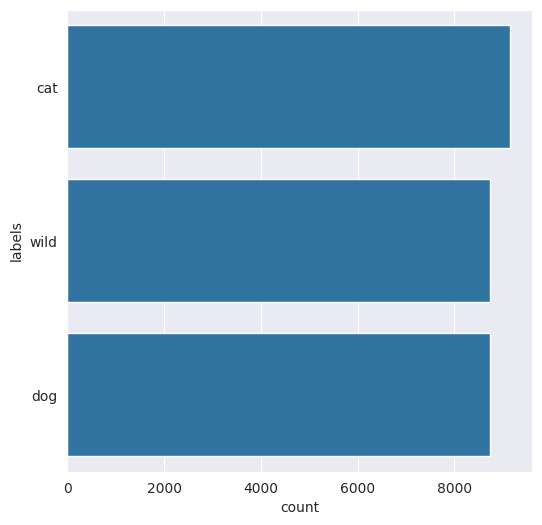

In [ ]:
animal_face="/content/Animal_Face/dataset"
file_name=[]
labels=[]
full_path=[]

for path, subdirs, files in os.walk(animal_face):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

distribution_train=pd.DataFrame({"file_path":full_path, 'file_name':file_name,"labels":labels})

Label=distribution_train['labels']
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plot_data=sns.countplot(Label)

Kode ini bertujuan untuk memeriksa distribusi gambar per kategori dalam dataset dan menampilkan jumlah gambar untuk setiap label secara visual, sehingga dapat mengidentifikasi apakah dataset seimbang atau ada kategori dengan jumlah gambar yang jauh lebih sedikit.

In [ ]:
my_path="/content/Animal_Face/dataset"

file_name=[]
labels=[]
full_path=[]

for path, subdirs, files in os.walk(my_path):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

df=pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
df.groupby(['labels']).size()

labels
cat     9153
dog     8739
wild    8738
dtype: int64

Kode ini bertujuan untuk mengetahui distribusi gambar per kategori dalam dataset, yang penting untuk mengevaluasi keseimbangan dataset dan memastikan model tidak bias terhadap kategori dengan jumlah gambar yang lebih banyak.

Menggunakan groupby(['labels']) dan size(), kode ini menghitung jumlah gambar per kategori dalam dataset. Hasilnya menunjukkan jumlah gambar untuk setiap label (kategori) sebagai berikut:

*   cat: 9153 gambar
*   dog: 8739 gambar
*   wild: 8738 gambar


# Split Dataset

---



In [ ]:
X=df['path']
y=df['labels']
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

Kode ini digunakan untuk membagi dataset menjadi data latih dan data uji. Membagi data menjadi 80% data latih dan 20% data uji. Parameter random_state=42 digunakan agar pembagian data konsisten setiap kali dijalankan.

In [ ]:
df_tr=pd.DataFrame({'path':X_train,'labels':y_train,'set':'train'})
df_ts=pd.DataFrame({'path':X_test, 'labels':y_test,'set':'test'})

Kode tersebut digunakan untuk membuat dua buah DataFrame baru yang secara eksplisit memisahkan data latih dan data uji setelah proses pembagian dataset. DataFrame pertama, df_tr, dibentuk dari X_train dan y_train, yang masing-masing berisi jalur gambar dan label untuk data latih.

In [ ]:
df_all=pd.concat([df_tr,df_ts],ignore_index=True)
print("============================================\n")
print(df_all.groupby(['set','labels']).size(),'\n')
print("===========================================\n")

print(df_all.sample(5))

datasource_path="/content/Animal_Face/dataset"
dataset_path="/content/Dataset/Final"
os.makedirs(dataset_path, exist_ok=True)


set    labels
test   cat       1866
       dog       1713
       wild      1747
train  cat       7287
       dog       7026
       wild      6991
dtype: int64 


                                                    path labels    set
19620  /content/Animal_Face/dataset/wild/flickr_wild_...   wild  train
8178   /content/Animal_Face/dataset/dog/pixabay_dog_0...    dog  train
10050  /content/Animal_Face/dataset/wild/flickr_wild_...   wild  train
6201   /content/Animal_Face/dataset/cat/pixabay_cat_0...    cat  train
20910  /content/Animal_Face/dataset/cat/augmented_cat...    cat  train


Kode ini digunakan untuk menggabungkan data latih dan data uji ke dalam satu DataFrame dan menyiapkan direktori baru untuk dataset akhir yang akan digunakan.

Output menunjukkan bahwa data terdistribusi cukup merata antara kelas cat, dog, dan wild, baik pada set pelatihan maupun pengujian. Setelah itu, ditampilkan sampel acak sebanyak lima baris dari df_all untuk melihat contoh isi data, yang terdiri atas path gambar, label, dan jenis set-nya.

In [ ]:
for index, row in tq(df_all.iterrows()):
  file_path=row['path']
  if os.path.exists(file_path) ==False:
    file_path=os.path.join(datasource_path, row['labels'], row['image'],split('.')[0])

  if os.path.exists(os.path.join(dataset_path,row['set'], row['labels'])) ==False:
    os.makedirs(os.path.join(dataset_path, row['set'], row['labels'])) ==True

  destination_file_name=file_path.split('/')[-1]

  file_dest=os.path.join(dataset_path, row['set'], row['labels'], destination_file_name)

  if os.path.exists(file_dest) ==False:
    shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

Kode ini digunakan untuk menyalin semua file gambar dari direktori sumber ke struktur direktori baru yang telah dipisahkan berdasarkan label dan jenis dataset (train/test). Iterasi dilakukan terhadap seluruh baris dalam df_all menggunakan tq() dari tqdm untuk menampilkan progress bar selama proses berlangsung.

In [ ]:
TRAIN_DIR="/content/Dataset/Final/train"
TEST_DIR="/content/Dataset/Final/test"

train_cat=os.path.join(TRAIN_DIR +'/cat')
train_dog= os.path.join(TRAIN_DIR +'/dog')
train_wild=os.path.join(TRAIN_DIR +'/wild')
test_cat=os.path.join(TEST_DIR + '/cat')
test_dog=os.path.join(TEST_DIR + '/dog')
test_wild=os.path.join(TEST_DIR + '/wild')

print('Total Number of Cat images in training dataset',len(os.listdir(train_cat)))
print('Total Number of dog images in training dataset',len(os.listdir(train_dog)))
print('Total Number of wild images in training dataset', len(os.listdir(train_wild)))
print('Total Number of Cat images in testing dataset',len(os.listdir(test_cat)))
print('Total Number of Dog images in testing dataset',len(os.listdir(test_dog)))
print('Total Number of Wild images in testing dataset',len(os.listdir(test_wild)))

Total Number of Cat images in training dataset 7287
Total Number of dog images in training dataset 7026
Total Number of wild images in training dataset 6991
Total Number of Cat images in testing dataset 1866
Total Number of Dog images in testing dataset 1713
Total Number of Wild images in testing dataset 1747


Kode di atas digunakan untuk menghitung jumlah total gambar pada masing-masing kategori (cat, dog, wild) dalam dataset pelatihan (training) dan pengujian (testing). Direktori TRAIN_DIR dan TEST_DIR masing-masing menunjuk pada lokasi dataset pelatihan dan pengujian.

# Modeling

---



Model machine learning dibangun menggunakan algoritma tertentu. Pada tahap ini dilakukan pelatihan model (training) dan validasi.

## Melakukan  data generator dan melakukan normalisasi gambar menjadi rentang 0 sampai dengan 1

---



In [ ]:
datagen=ImageDataGenerator(rescale=1/225., validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1. /255)
train_generator=datagen.flow_from_directory(TRAIN_DIR,
                                            batch_size=32,
                                            target_size=(150,150),
                                            class_mode='categorical',
                                            subset='training',
                                            shuffle=True
                                            )
validation_generator=datagen.flow_from_directory(TRAIN_DIR,
                                                 batch_size=32,
                                                 target_size=(150,150),
                                                 class_mode='categorical',
                                                 subset='validation',
                                                 shuffle=False)

testing_generator=test_datagen.flow_from_directory(TEST_DIR,
                                                   batch_size=1,
                                                   target_size=(150,150),
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 17044 images belonging to 3 classes.
Found 4260 images belonging to 3 classes.
Found 5326 images belonging to 3 classes.


Tahap ini menyiapkan data citra untuk pelatihan, validasi, dan pengujian menggunakan ImageDataGenerator. Data pelatihan dan validasi diskalakan dengan faktor 1/225 dan dibagi 80:20, sementara data uji diskalakan 1/255. Generator train_generator, validation_generator, dan testing_generator digunakan untuk menghasilkan batch gambar berukuran 150x150 piksel sesuai kebutuhan model, dengan atau tanpa pengacakan data.

*   Train: 17.044 gambar untuk pelatihan dari 3 kelas(cat, dog, wild).

*   Validation: 4.260 gambar untuk validasi dari 3 kelas(cat, dog, wild).


*  Test: 5.326 gambar untuk pengujian dari 3 kelas(cat, dog, wild).

# Pembuatan Arsitektur CNN

---



In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), padding='same',activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(5,5), padding='same',activation='relu'))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (7,7), padding='same', activation='relu'))
model.add(Conv2D(128, (7,7), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(128, (11,11), padding='same',activation='relu'))
model.add(Conv2D(128, (11,11),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(3,activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 70, 70, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 70, 70, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 35, 35, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 128)    │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             

 Total params: 5,499,555 (20.98 MB)

 Trainable params: 5,498,851 (20.98 MB)

 Non-trainable params: 704 (2.75 KB)

1.   Layer Konvolusi (Conv2D) dengan 32 filter

*   Ukuran kernel: 3x3
*   Padding: 'same' untuk mempertahankan dimensi input
*   Aktivasi: ReLU
*   Input shape: (150, 150, 3) untuk citra berwarna


---


2.   Layer Konvolusi kedua dengan 32 filter

*   Ukuran kernel: 3x3
*   Aktivasi: ReLU
*   Batch Normalization untuk menstabilkan pelatihan


---


3.   MaxPooling dan Dropout

*   Pooling: MaxPool2D dengan ukuran 2x2 untuk mengurangi dimensi fitur
*   Dropout: 0.3 untuk mencegah overfitting


---


4.   Blok Konvolusi dengan 64 filter

*   Ukuran kernel: 5x5
*   Padding: 'same'
*   Aktivasi: ReLU
*   Batch Normalization dan MaxPool2D untuk mengurangi ukuran spasial


---


5.   Blok Konvolusi dengan 128 filter

*   Ukuran kernel: 7x7
*   Padding: 'same'
*   Aktivasi: ReLU
*   Batch Normalization dan MaxPool2D diikuti dengan Dropout

---

6.   Blok Konvolusi dengan 128 filter dan ukuran kernel 11x11

*   Padding: 'same'
*   Aktivasi: ReLU
*   MaxPool2D dan Dropout diterapkan.


---


7.   Flatten

*   Menyusun kembali output dari layer konvolusi menjadi vektor satu dimensi

---

8.   Dense Layer pertama dengan 256 unit

*   Aktivasi: ReLU
*   Dropout: 0.5 untuk mencegah overfitting


---


9.   Dense Layer kedua dengan 128 unit

*   Aktivasi: ReLU
*   Dropout: 0.3


---


10.   Output Layer

*   Dense layer dengan 3 unit, menggunakan aktivasi softmax untuk klasifikasi tiga kelas (kucing, anjing, hewan liar).

---

11.   Model Summary

*   Menampilkan ringkasan jumlah parameter dan struktur model.

---













In [ ]:
count_cat=len(os.listdir(train_cat))
count_dog=len(os.listdir(train_dog))
count_wild=len(os.listdir(train_wild))

tosum=count_cat +count_dog +count_wild

weight_0 = (1/ count_cat) *(tosum / 3)
weight_1 = (1/count_dog) * (tosum / 3)
weight_2 = (1/count_wild) * (tosum / 3)

class_weights={
    0 : weight_0,
    1 : weight_1,
    2 : weight_2
}

Pada kode ini, dilakukan perhitungan bobot kelas (class weights) untuk mengatasi masalah ketidakseimbangan jumlah gambar antara kelas-kelas dalam dataset. Pertama, dihitung jumlah gambar pada masing-masing kelas, yaitu "cat", "dog", dan "wild" yang ada di direktori pelatihan. Selanjutnya, jumlah total gambar dalam dataset dihitung dengan menjumlahkan gambar-gambar dari ketiga kelas tersebut. Untuk menghitung bobot setiap kelas, digunakan rumus yang memperhitungkan jumlah gambar per kelas, di mana kelas dengan jumlah gambar lebih sedikit akan memiliki bobot yang lebih besar. Bobot setiap kelas dihitung sebagai invers dari jumlah gambar di kelas tersebut, dikalikan dengan total gambar dalam dataset dibagi 3. Hasil perhitungan ini kemudian disusun dalam bentuk dictionary yang berisi bobot untuk masing-masing kelas. Dengan menggunakan class weights ini saat pelatihan, model akan lebih memperhatikan kelas-kelas dengan jumlah gambar yang lebih sedikit, sehingga dapat mengurangi bias terhadap kelas yang lebih dominan dalam dataset.

## Pembuatan Fungsi Callback Jika Kondisi Terpenuhi

---



In [ ]:
class CustomCallback(Callback):
  def on_epoch_end(self, epoch,logs=None):
    logs=logs or {}
    val_acc=logs.get('val_accuracy')
    val_loss=logs.get('val_loss')

    if val_acc is not None and val_loss is not None:
      if val_acc >=0.85 and val_loss <=0.55:
        print(f"\nTraining Model Stopped: val_accuracy={val_acc:.2f}, val loss:{val_loss:.2f}")
        self.model.stop_training=True

Pada kode ini, sebuah callback kustom bernama CustomCallback didefinisikan dengan tujuan untuk menghentikan pelatihan model jika kriteria tertentu tercapai. Kelas ini mewarisi dari Callback yang disediakan oleh Keras. Pada metode on_epoch_end, yang dipanggil setelah setiap epoch selesai, kode ini memeriksa apakah nilai akurasi validasi (val_accuracy) dan nilai kehilangan validasi (val_loss) tersedia dalam log. Jika keduanya ada, maka dilakukan pengecekan apakah akurasi validasi telah mencapai nilai 0.85 atau lebih, dan apakah kehilangan validasi berada di bawah 0.55. Jika kedua kondisi ini terpenuhi, maka pelatihan model akan dihentikan secara paksa dengan mengubah atribut stop_training menjadi True, dan pesan akan dicetak yang menunjukkan nilai akurasi dan kehilangan validasi pada saat pelatihan dihentikan.

## Inisiasi Optimizer

---



In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy',metrics =['accuracy'])

Model dikompilasi menggunakan optimizer RMSprop dan fungsi kerugian categorical_crossentropy untuk klasifikasi multikelas. Metrik yang digunakan adalah accuracy untuk mengukur persentase prediksi yang benar.

## Melakukan Pelatihan Model

---



In [ ]:
history=model.fit(
    train_generator,
    epochs=50,
    batch_size=32,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[CustomCallback()]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


533/533 ━━━━━━━━━━━━━━━━━━━━ 93s 139ms/step - accuracy: 0.4859 - loss: 1.1629 - val_accuracy: 0.5697 - val_loss: 0.9230
Epoch 2/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 110s 108ms/step - accuracy: 0.8092 - loss: 0.4836 - val_accuracy: 0.6549 - val_loss: 0.7823
Epoch 3/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 83s 110ms/step - accuracy: 0.8773 - loss: 0.3156 - val_accuracy: 0.5836 - val_loss: 0.9318
Epoch 4/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 58s 108ms/step - accuracy: 0.9017 - loss: 0.2580 - val_accuracy: 0.5444 - val_loss: 2.4152
Epoch 5/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 58s 108ms/step - accuracy: 0.9221 - loss: 0.2106 - val_accuracy: 0.7448 - val_loss: 0.6782
Epoch 6/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 59s 110ms/step - accuracy: 0.9405 - loss: 0.1717 - val_accuracy: 0.8143 - val_loss: 0.4433
Epoch 7/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.9468 - loss: 0.1491 - val_accuracy: 0.7791 - val_loss: 0.5215
Epoch 8/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 58s 108ms/step - accuracy: 0.9545 - loss: 0.1282 - va

Pada proses pelatihan model, training dihentikan setelah mencapai ambang batas tertentu, yaitu akurasi validasi minimal 85% dan loss validasi maksimal 0.55. Model menunjukkan peningkatan yang signifikan dari epoch pertama dengan akurasi 48.59% menjadi 85.07% pada epoch ke-10, dengan penurunan nilai loss secara bertahap. Proses training berhenti secara otomatis setelah mencapai hasil yang diinginkan.

# Visualisasi dan Evaluasi Model

---



Evaluasi dilakukan untuk mengukur performa model dengan menggunakan metrik seperti akurasi, precision, recall, atau confusion matrix.

## Melakukan Testing pada Data Train

---



In [ ]:
loss,accuracy=model.evaluate(train_generator)
print(f"Loss: {loss:.4f}")
print(f"Akurasi: {accuracy:.4f}")

533/533 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.9730 - loss: 0.0763
Loss: 0.0762
Akurasi: 0.9731


Pada evaluasi model dengan menggunakan data training, hasil yang diperoleh adalah loss sebesar 0.0763 dan akurasi 97.31%. Angka ini menunjukkan bahwa model berhasil melakukan klasifikasi dengan tingkat akurasi yang tinggi pada data training.

## Melakukan testing pada data Test

---



In [ ]:
loss,accuracy=model.evaluate(testing_generator)
print(f"Loss: {loss:.4f}")
print(f"Akurasi: {accuracy:.4f}")

5326/5326 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9060 - loss: 0.2401
Loss: 0.1950
Akurasi: 0.9271


Pada evaluasi model dengan menggunakan data testing, hasil yang diperoleh adalah loss sebesar 0.1950 dan akurasi 92.71%. Ini menunjukkan bahwa model memiliki kemampuan generalisasi yang baik dan dapat mengklasifikasikan gambar dengan akurasi yang tinggi pada data yang belum pernah dilihat sebelumnya.

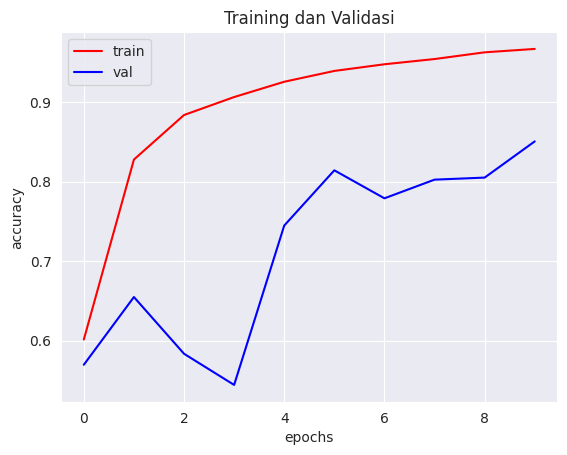

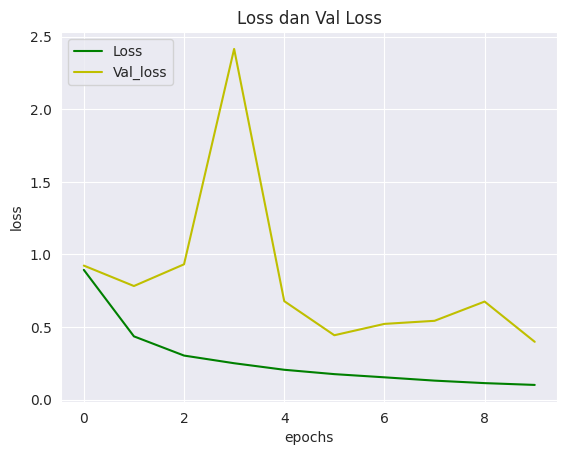

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs,acc,'r')
plt.plot(epochs, val_acc,'b')
plt.title('Training dan Validasi')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'g')
plt.plot(epochs, val_loss, 'y')
plt.title('Loss dan Val Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Loss','Val_loss'],loc='upper left')
plt.show()

Kode yang digunakan berfungsi untuk memvisualisasikan hasil pelatihan model. Variabel acc dan val_acc merekam nilai akurasi dari data pelatihan dan validasi yang diambil dari objek history. Sementara itu, variabel loss dan val_loss merekam nilai loss dari data pelatihan dan validasi. Dengan memanfaatkan matplotlib.pyplot, dibuat dua buah grafik. Grafik pertama menampilkan perkembangan akurasi (accuracy) terhadap jumlah epoch, baik untuk data pelatihan maupun validasi, sehingga memudahkan untuk mengamati perbedaan performa keduanya. Grafik kedua menampilkan perkembangan loss terhadap jumlah epoch, yang berguna untuk memantau penurunan error selama proses pelatihan dan validasi.

Dari grafik akurasi, terlihat bahwa akurasi data pelatihan meningkat stabil seiring bertambahnya epoch, sementara akurasi validasi mengalami fluktuasi namun menunjukkan tren kenaikan hingga lebih dari 85%.
Pada grafik loss, nilai loss pelatihan konsisten menurun, menunjukkan proses belajar model berjalan baik, sedangkan loss validasi sempat naik tajam sebelum akhirnya menurun stabil, mengindikasikan awal overfitting namun berhasil diperbaiki setelah beberapa epoch.

5326/5326 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step


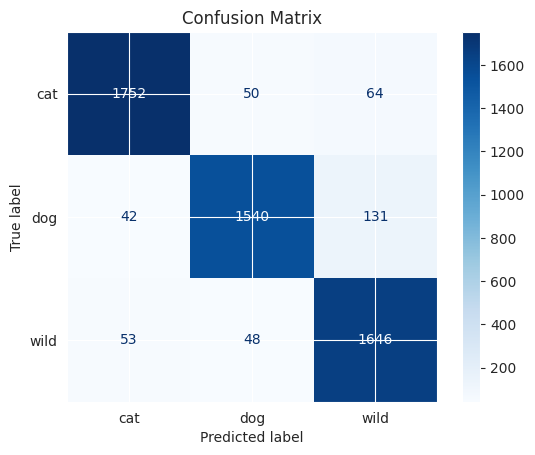

Classification Report:
               precision    recall  f1-score   support

         cat       0.95      0.94      0.94      1866
         dog       0.94      0.90      0.92      1713
        wild       0.89      0.94      0.92      1747

    accuracy                           0.93      5326
   macro avg       0.93      0.93      0.93      5326
weighted avg       0.93      0.93      0.93      5326



In [ ]:
Y_pred=model.predict(testing_generator)

y_pred=np.argmax(Y_pred, axis=1)
y_true=testing_generator.classes
class_names=list(testing_generator.class_indices.keys())

Confusion=confusion_matrix(y_true,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=Confusion,display_labels=class_names)
display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report=classification_report(y_true,y_pred,target_names=class_names)
print("Classification Report:\n",report)

Pada tahap evaluasi model, fungsi model.predict(testing_generator) digunakan untuk menghasilkan prediksi kelas berdasarkan data uji. Hasil prediksi tersebut kemudian diubah menjadi label kelas (y_pred) dengan mengambil indeks nilai probabilitas tertinggi. Selanjutnya, fungsi confusion_matrix digunakan untuk menghitung matriks kebingungan antara label sebenarnya (y_true) dan label hasil prediksi (y_pred). Matriks ini divisualisasikan menggunakan ConfusionMatrixDisplay agar pola kesalahan klasifikasi antar kelas dapat diamati dengan lebih jelas. Selain itu, evaluasi performa model juga dilakukan dengan menggunakan classification_report, yang menghasilkan metrik seperti precision, recall, dan f1-score untuk masing-masing kelas.

Berdasarkan confusion matrix dan classification report :


*   Model menunjukkan akurasi keseluruhan sebesar 93% pada data testing.
*   Kelas cat mencapai precision 95% dan recall 94%.
*   Kelas dog memperoleh precision 94% dan recall 90%.
*   Kelas wild mendapatkan precision 89% dan recall 94%.


# Saved Model

---



In [ ]:
model.save('/content/Animal_Dataset.h5')

Model disimpan menggunakan model.save('/content/Animal_Dataset.h5') agar hasil pelatihan tidak perlu diulang kembali di masa depan. Dengan menyimpan model, seluruh struktur arsitektur, bobot, dan konfigurasi pelatihan akan terdokumentasi dalam satu file. Pada implementasi ke depan, file model ini dapat langsung dimuat kembali untuk keperluan inferensi (prediksi) tanpa harus melakukan pelatihan ulang, sehingga menghemat waktu, sumber daya komputasi, dan memudahkan penerapan model ke dalam aplikasi nyata, seperti sistem klasifikasi gambar berbasis web atau mobile.